In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import log_loss, mean_squared_error, mean_absolute_error, r2_score

In [7]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/tested.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Exploratory Data Analysis

0= dead , 1=alive

1=firstclass, 2=2nd class , 3= 3rd class

The “Embarked”indicates the port where passengers got on board the Titanic.
Here’s what each value represents:

C = Cherbourg: A city in northern France.

Q = Queenstown (now known as Cobh): A town in County Cork, Ireland.

S = Southampton: A city on the south coast of England.

In [13]:
df.shape

(418, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Data Visualization

<ipython-input-25-30495da670dc>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'],color='g')


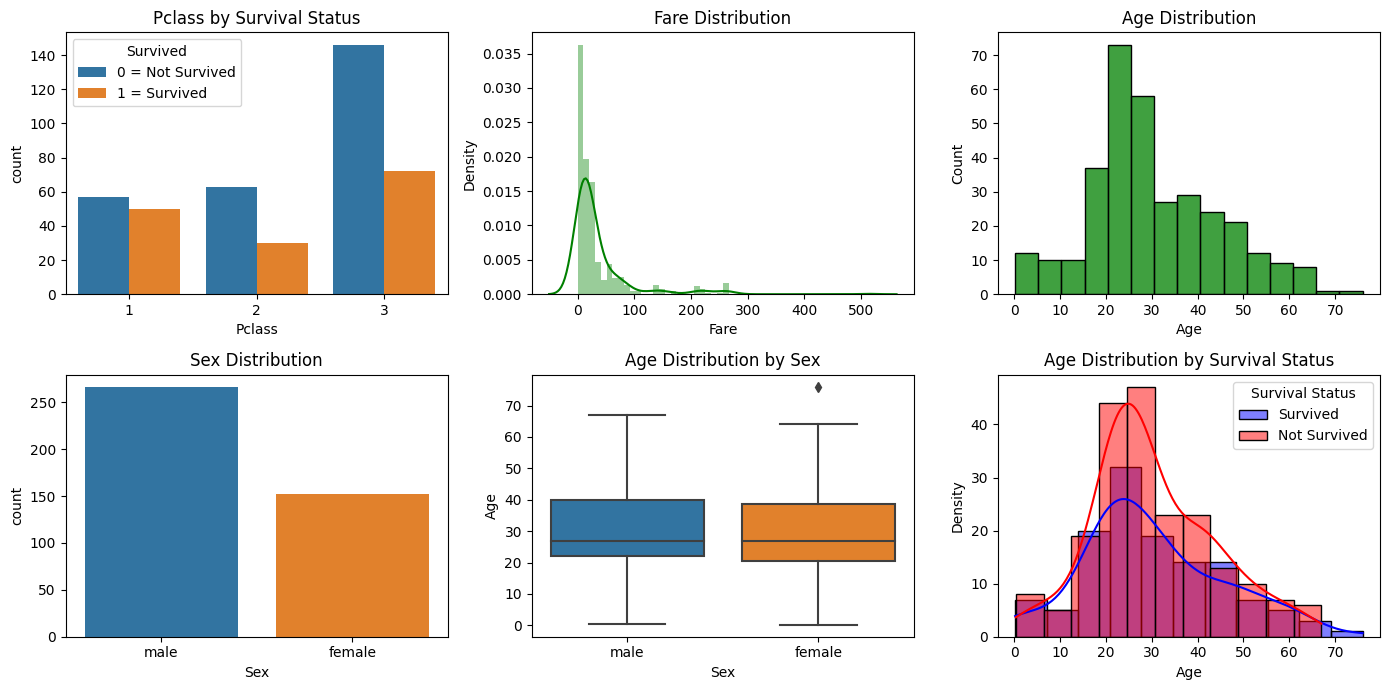

In [25]:
plt.figure(figsize=(14,7))
plt.subplot(2,3,1)
sns.countplot(x='Pclass',data=df,hue='Survived')
legend_labels = {0: 'Not Survived', 1: 'Survived'}
plt.legend(title='Survived', labels=[f"{key} = {value}" for key, value in legend_labels.items()])
plt.title('Pclass by Survival Status')

plt.subplot(2,3,2)
sns.distplot(df['Fare'],color='g')
plt.title('Fare Distribution')

plt.subplot(2,3,3)
sns.histplot(df['Age'],color='g')
plt.title('Age Distribution')

plt.subplot(2,3,4)
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')

plt.subplot(2,3,5)
sns.boxplot(x='Sex', y = 'Age',data= df)
plt.title('Age Distribution by Sex')

plt.subplot(2,3,6)
sns.histplot(data=df[df['Survived'] == 1], x='Age', kde=True, color='blue', label='Survived')
sns.histplot(data=df[df['Survived'] == 0], x='Age', kde=True, color='red', label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Survival Status')
plt.legend(title='Survival Status')

plt.tight_layout()
plt.show()

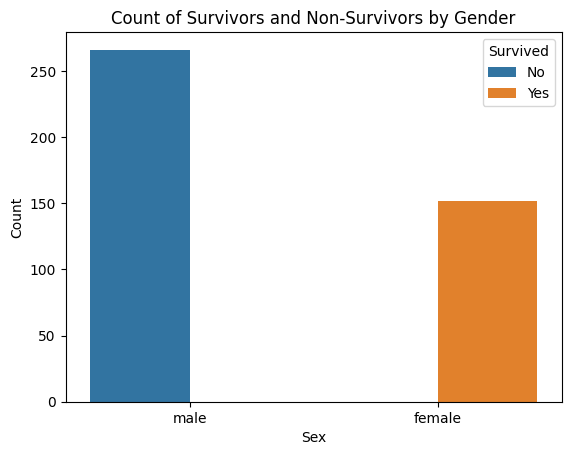

In [26]:
sns.countplot(x='Sex', data=df, hue='Survived')

# Set plot labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Survivors and Non-Survivors by Gender')

# Add a legend to distinguish survivors (1) and non-survivors (0)
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

All the survivors are Females. Unbalanced Data.

In [36]:
df[(df['Survived'] == 1)&(df['Sex'] == "male")]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare


<ipython-input-27-02fb3e1476d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


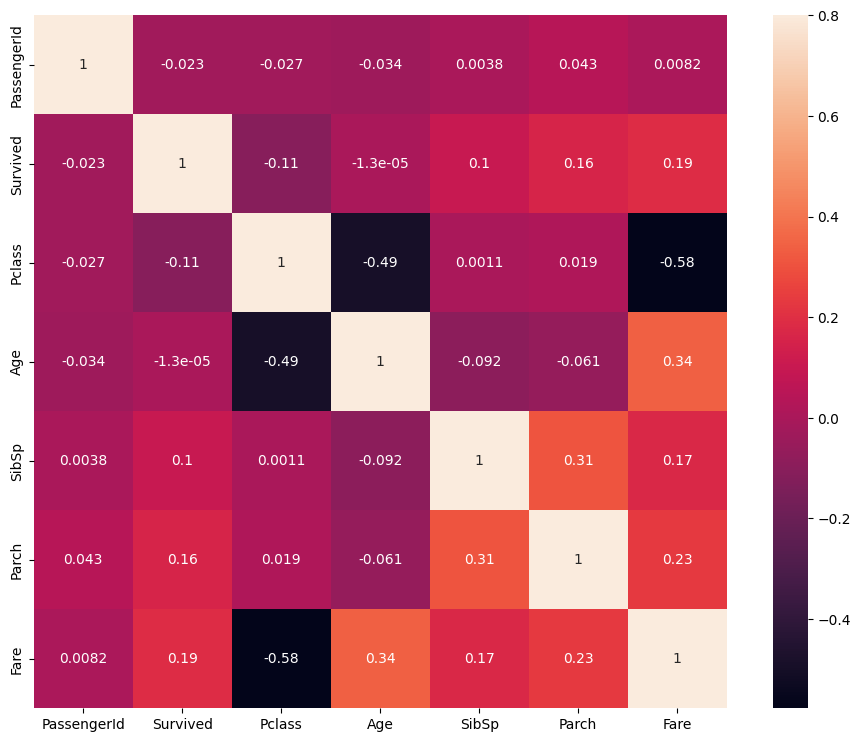

In [27]:
# Heatmap
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

## EDA

In [29]:
df.drop(columns=['PassengerId','Name','Embarked','Cabin'],inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [31]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
dtype: int64

In [32]:
# Filled the missing value in Age column with the median value
df['Age'] = df['Age'].fillna(df['Age'].median())

# Filled the missing value in Fare columns with median Value
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [34]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

In [69]:
label_encoder = LabelEncoder()
# Apply Label Encoding to 'Sex' column
#df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Sex'] = df['Sex'].replace({'male':1,'female':0})

import re
# Extract numeric part from 'Ticket' column using regular expressions
df['Ticket'] = df['Ticket'].apply(lambda x: re.sub(r'\D', '', x))

In [70]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,1,34.5,0,0,330911,7.8292
1,1,3,0,47.0,1,0,363272,7.0000
2,0,2,1,62.0,0,0,240276,9.6875
3,0,3,1,27.0,0,0,315154,8.6625
4,1,3,0,22.0,1,1,3101298,12.2875


In [71]:
X = df.drop(['Survived','Ticket'],axis=1)
y = df['Survived']

In [72]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875


In [73]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

## Training and Testing

In [76]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [75]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [77]:
# List of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

In [79]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)  # Compute classification report
    print(f"{model_name} - Accuracy: {accuracy:.2f}")
    loss = log_loss(y_test, model.predict_proba(X_test))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Log Loss: {loss:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'R2 Score: {r2:.2f}')
    print(f"Classification Report:\n{report}\n")

Logistic Regression - Accuracy: 1.00
Log Loss: 0.04
MSE: 0.00
MAE: 0.00
R2 Score: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        32

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Random Forest - Accuracy: 1.00
Log Loss: 0.03
MSE: 0.00
MAE: 0.00
R2 Score: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        32

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
df5 = pd.DataFrame({'Actual ': y_test , 'Predicted': y_pred})
df5

,Actual,Predicted
307,0,0
241,1,1
227,1,1
66,1,1
15,1,1
...,...,...
196,0,0
55,0,0
144,0,0
116,0,0


## Prediction

In [81]:
# Enter : Pclass, Sex,	Age,	SibSp,	Parch,	Fare
# Didn't Survive ---> 0
# Survived  -----> 1

sample_check=[[3, 1, 34.0, 0, 0, 7.8292],
              [1, 0, 48.0, 1, 0, 106.425]
             ]

for i in sample_check:
    x=model[0].predict([i])
    if(x==0):
        print("Passenger Didn't Survive")
    elif(x==1):
        print("Passenger Survived")


Passenger Didn't Survive
Passenger Survived
